## Post_Processing of data obtained with Conf_Diss_code

Load the data and compute/plot serveral things.

### To Do:

1. Add checking of conserved quantities $(e,s)$
2. Add entropy conputation (to see that grows, that checks lot of things in the code)
3. Check for some sort of estationary solutions that remain after the initial data moves.

In [1]:
using Plots, DifferentialEquations, FileIO, JLD2

In [2]:
pwd()
readdir("Resultados/Soluciones")

12-element Vector{String}:
 ".DS_Store"
 "big_pulse_to_the_right_E_fast.jld2"
 "big_right_long.jld2"
 "big_right_long_fast.jld2"
 "big_right_short_fast.jld2"
 "small_right_p.jld2"
 "speed_pulse.jld2"
 "speed_pulse_initialized.jld2"
 "speed_pulse_initialized_neg.jld2"
 "speed_pulse_initialized_pos.jld2"
 "speed_pulse_long.jld2"
 "square_pulse_short.jld2"

In [22]:
JLD2.@load "Resultados/Soluciones/speed_pulse_initialized.jld2" speed_pulse_initialized
JLD2.@load "Resultados/Soluciones/speed_pulse_initialized_neg.jld2" speed_pulse_initialized_neg
JLD2.@load "Resultados/Soluciones/speed_pulse.jld2" speed_pulse
#sol_init = load("Resultados/Soluciones/speed_pulse_initialized.jld2","");
sol_init = speed_pulse_initialized;
sol = speed_pulse;
sol_init_neg = speed_pulse_initialized_neg;

┌ Warning: some parameters could not be resolved for type ODEFunction{true,Main.#evolution_fast,LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing}; reconstructing
└ @ JLD2 /Users/reula/.julia/packages/JLD2/F7wiE/src/data/reconstructing_datatypes.jl:440
┌ Warning: some parameters could not be resolved for type ODEFunction{true,Main.#evolution_fast,LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing}; reconstructing
└ @ JLD2 /Users/reula/.julia/packages/JLD2/F7wiE/src/data/reconstructing_datatypes.jl:440
┌ Warning: some parameters could not be resolved for type ODEFunction{true,Main.#evolution_fast,LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DE

In [23]:
#@save "out.jld2" sol
#JLD2.@load "Resultados/Soluciones/solright_p.jld2" sol

In [24]:
Ti = sol_init.t[1]
length(sol_init(Ti))
#sol_init.t[end]

6000

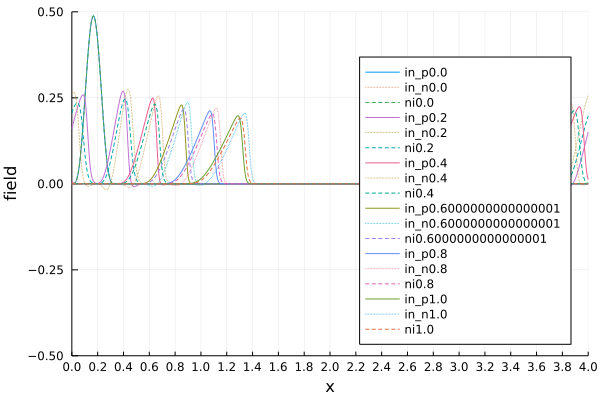

In [39]:
Tf = sol_init.t[end]
Ti = sol_init.t[1]
dt = (Tf - Ti)/(length(sol_init.t)-1)
U=10
T = length(sol_init.t) # number of temporal steps 
M=length(sol_init(Ti))÷U
L=4
dx = L/(M-1)
x = 0:dx:L
a = 20.0*dt
t = [(i-1)*a for i ∈ 1:6]
field =7
plot(xticks = 0:0.2:10, legend=:bottomright
    ,xaxis=("x",(0.0,L))
    ,yaxis=("field",(-0.5,0.5))
    )
for s in t
    plot!(x,reshape(sol_init(s),(M,U))[:,field], label="in_p$s")
    plot!(x,reshape(sol_init_neg(s),(M,U))[:,field], ls=:dot, label="in_n$s")
    plot!(x,reshape(sol(s),(M,U))[:,field], ls=:dash, label="ni$s")
end    
current()


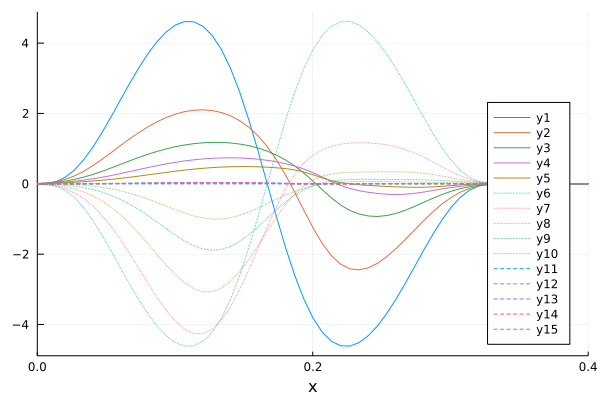

In [31]:
plot(x,reshape(sol_init(t[1]),(M,U))[:,field],xticks = 0:0.2:10, legend=:bottomright
    ,xaxis=("x",(0.0,0.4))
    )
plot!(x,reshape(sol_init(t[2]),(M,U))[:,field])
plot!(x,reshape(sol_init(t[3]),(M,U))[:,field])
plot!(x,reshape(sol_init(t[4]),(M,U))[:,field])
plot!(x,reshape(sol_init(t[5]),(M,U))[:,field])
plot!(x,reshape(sol_init_neg(t[1]),(M,U))[:,field],xticks = 0:0.2:10, legend=:bottomright, ls=:dot)
plot!(x,reshape(sol_init_neg(t[2]),(M,U))[:,field], ls=:dot)
plot!(x,reshape(sol_init_neg(t[3]),(M,U))[:,field], ls=:dot)
plot!(x,reshape(sol_init_neg(t[4]),(M,U))[:,field], ls=:dot)
plot!(x,reshape(sol_init_neg(t[5]),(M,U))[:,field], ls=:dot)
plot!(x,reshape(sol(t[1]),(M,U))[:,field],xticks = 0:0.2:10, legend=:bottomright, ls=:dash)
plot!(x,reshape(sol(t[2]),(M,U))[:,field], ls=:dash)
plot!(x,reshape(sol(t[3]),(M,U))[:,field], ls=:dash)
plot!(x,reshape(sol(t[4]),(M,U))[:,field], ls=:dash)
plot!(x,reshape(sol(t[5]),(M,U))[:,field], ls=:dash)

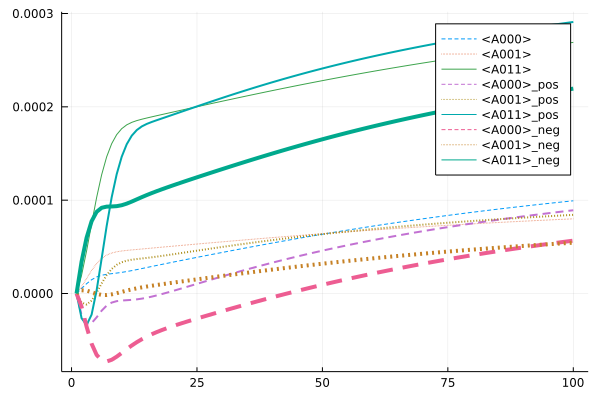

In [32]:
a000 = [sum(reshape(sol(dt*i),(M,U))[:,3]) for i in 1:100]/M
a001 = [sum(reshape(sol(dt*i),(M,U))[:,4]) for i in 1:100]/M
a011 = [sum(reshape(sol(dt*i),(M,U))[:,5]) for i in 1:100]/M
a000_pos = [sum(reshape(sol_init(dt*i),(M,U))[:,3]) for i in 1:100]/M
a001_pos = [sum(reshape(sol_init(dt*i),(M,U))[:,4]) for i in 1:100]/M
a011_pos = [sum(reshape(sol_init(dt*i),(M,U))[:,5]) for i in 1:100]/M
a000_neg = [sum(reshape(sol_init_neg(dt*i),(M,U))[:,3]) for i in 1:100]/M
a001_neg = [sum(reshape(sol_init_neg(dt*i),(M,U))[:,4]) for i in 1:100]/M
a011_neg = [sum(reshape(sol_init_neg(dt*i),(M,U))[:,5]) for i in 1:100]/M


plot(a000 .- a000[1], ls=:dash, label="<A000>")
plot!(1*(a001.- a001[1]), ls=:dot, lw=1, label="<A001>")
plot!(a011.- a011[1], label="<A011>")
plot!(a000_pos .- a000_pos[1], ls=:dash, lw=2, label="<A000>_pos")
plot!(1*(a001_pos.- a001_pos[1]), ls=:dot, lw=2, label="<A001>_pos")
plot!(a011_pos.- a011_pos[1], lw=2, label="<A011>_pos")
plot!(a000_neg .- a000_neg[1], ls=:dash, lw=4, label="<A000>_neg")
plot!(1*(a001_neg.- a001_neg[1]), ls=:dot, lw=4, label="<A001>_neg")
plot!(a011_neg.- a011_neg[1], lw=4, label="<A011>_neg")

#savefig("Resultados/Movies/flu_$out_name"*"A0")
current()

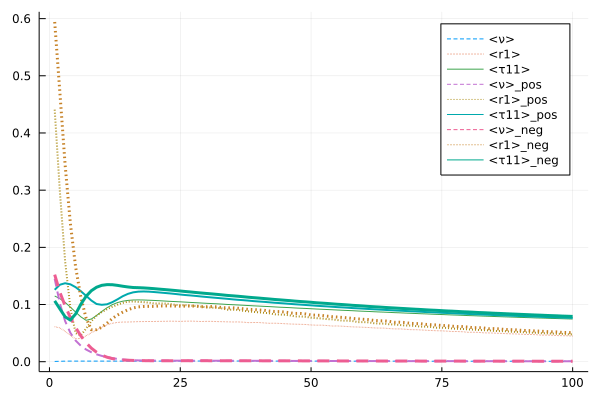

In [28]:
x1 = [sum(abs.(reshape(sol(dt*i),(M,U))[:,8])) for i in 1:100]/M
x2 = [sum(abs.(reshape(sol(dt*i),(M,U))[:,9])) for i in 1:100]/M
x3 = [sum(abs.(reshape(sol(dt*i),(M,U))[:,10])) for i in 1:100]/M
plot(x1*1, ls=:dash, lw=1, label="<ν>")
plot!(x2*100, ls=:dot, lw=1, label="<r1>")
plot!(x3*10, lw=1, label="<τ11>")
x1 = [sum(abs.(reshape(sol_init(dt*i),(M,U))[:,8])) for i in 1:100]/M
x2 = [sum(abs.(reshape(sol_init(dt*i),(M,U))[:,9])) for i in 1:100]/M
x3 = [sum(abs.(reshape(sol_init(dt*i),(M,U))[:,10])) for i in 1:100]/M
plot!(x1*1, ls=:dash, lw=2, label="<ν>_pos")
plot!(x2*100, ls=:dot, lw=2, label="<r1>_pos")
plot!(x3*10, lw=2, label="<τ11>_pos")
x1 = [sum(abs.(reshape(sol_init_neg(dt*i),(M,U))[:,8])) for i in 1:100]/M
x2 = [sum(abs.(reshape(sol_init_neg(dt*i),(M,U))[:,9])) for i in 1:100]/M
x3 = [sum(abs.(reshape(sol_init_neg(dt*i),(M,U))[:,10])) for i in 1:100]/M
plot!(x1*1, ls=:dash, lw=3, label="<ν>_neg")
plot!(x2*100, ls=:dot, lw=3, label="<r1>_neg")
plot!(x3*10, lw=3, label="<τ11>_neg")



current()

In [10]:
c1 = (2.35 - 0.1)/4

0.5625

In [11]:
c2 = (3.28 - 0.1)/4

0.7949999999999999

## Velocity approximations

With **small_right_p_E**     e0 = 6.; δe = 0.1    x0 = 0.; x1 = 0.2  λ = 1. /sqrt(3.) χ = [- 1.0; - 0.0; - 10.0]

    1. c1 = 0.5775 *this is the sound speed, around (0.57735) for radiation
    
With **small_right_p**     e0 = 6.; δe = 0.1    x0 = 0.; x1 = 0.2  λ = 1. /sqrt(3.) χ = [- 1.0; - 0.5; - 10.0]   

    1. c1 = 0.562
    2. c2 = 0.795

## Grandes Desviaciones y Choques

In [12]:
sol_big = load("Resultados/Soluciones/big_right_p.jld2","big_right_p");
sol_big_neg_I = load("Resultados/Soluciones/big_right_p_neg_I.jld2","big_right_p_neg_I");
sol_big_E = load("Resultados/Soluciones/big_right_p_E.jld2","big_right_p_E");

LoadError: ArgumentError: No file exists at given path: Resultados/Soluciones/big_right_p.jld2

In [13]:
ssol(t)=sol_big_neg_I(t)
t = 4
U=10
M=600
L=4
dx = L/599
x = 0:L/599:dx*599
field = 1
plot(x,reshape(ssol(0.),(M,U))[:,field],xticks = 0:0.2:10)
plot!(x,reshape(ssol(t/1.5),(M,U))[:,field])
#plot!(x,reshape(ssol(0.8*t),(M,U))[:,field])
#plot!(x,reshape(ssol(0.9*t),(M,U))[:,field])
#plot!(x,reshape(ssol(t/1),(M,U))[:,field])

LoadError: UndefVarError: sol_big_neg_I not defined

## Shocks at late time

Notice that in the case of dissipation dere are two shocks. 
On the other hand, with negative sources the schock grows a lot. 
Not sure of that sign, we should compute the entropy....
Clearly with the negative sign things get out of control



In [14]:
csol(t) = sol_big(t)
csol_Ing(t) = sol_big_neg_I(t)
csolE(t) = sol_big_E(t)

t = 4
U=10
M=600
L=4
dx = L/599
x = 0:L/599:dx*599
field = 2
#plot(x,reshape(csol(0.),(M,U))[:,field],xticks = 0:0.2:10)#, xlim = (1.6,4))
#plot!(x,reshape(csol(t/8),(M,U))[:,field])
#plot!(x,reshape(csol(t/4),(M,U))[:,field])
#plot!(x,reshape(csol(t/2),(M,U))[:,field])
plot(x,reshape(csol(t/1),(M,U))[:,field])

#plot!(x,reshape(csolE(0.),(M,U))[:,field],xticks = 0:0.2:10)
#plot!(x,reshape(csolE(t/8),(M,U))[:,field])
#plot!(x,reshape(csolE(t/4),(M,U))[:,field])
#plot!(x,reshape(csolE(t/2),(M,U))[:,field])
plot!(x,reshape(csolE(t/1),(M,U))[:,field])

#plot(x,reshape(csol_Ing(0.),(M,U))[:,field],xticks = 0:0.2:10)
#plot!(x,reshape(csol_Ing(t/8),(M,U))[:,field])
#plot!(x,reshape(csol_Ing(t/4),(M,U))[:,field])
#plot!(x,reshape(csol_Ing(t/2),(M,U))[:,field])
plot!(x,reshape(csol_Ing(t/1),(M,U))[:,field])


LoadError: UndefVarError: sol_big not defined

In [15]:
ℯ

ℯ = 2.7182818284590...